In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

df = pd.read_csv('./archive/satellite.mat.csv')

path_pattern = './output/persistence/{}'
df.to_pickle(path_pattern.format('df.pkl'))

# Generally look at what data points and types there are, and see if there is any missing
print('DF Shape: \n', df.shape)
print('DF head: \n', df.head())
print('DF with data types: \n', df.info())
print('DF with empty values: \n', df.isnull().sum())

DF Shape: 
 (6435, 38)
DF head: 
    ID  V0   V1   V2  V3  V4   V5   V6  V7  V8  ...  V27  V28  V29  V30  V31  \
0   0  92  115  120  94  84  102  106  79  84  ...  104   88  121  128  100   
1   1  84  102  106  79  84  102  102  83  80  ...  100   84  107  113   87   
2   2  84  102  102  83  80  102  102  79  84  ...   87   84   99  104   79   
3   3  80  102  102  79  84   94  102  79  80  ...   79   84   99  104   79   
4   4  84   94  102  79  80   94   98  76  80  ...   79   84  103  104   79   

   V32  V33  V34  V35  Y  
0   84  107  113   87  0  
1   84   99  104   79  0  
2   84   99  104   79  0  
3   84  103  104   79  0  
4   79  107  109   87  0  

[5 rows x 38 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6435 non-null   int64
 1   V0      6435 non-null   int64
 2   V1      6435 non-null   int64
 3   V2      6435 non-nu

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000


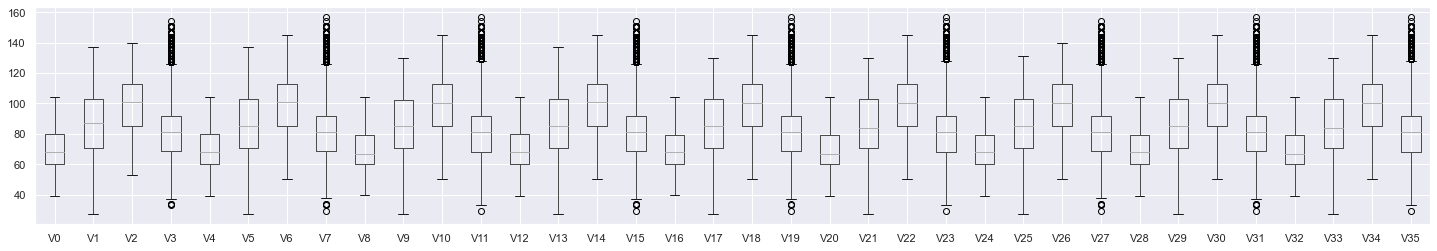

In [19]:
# Explore means, variances (sqaured root ie. std) and quantiles of column features, and boxplot
fig, ax = plt.subplots(figsize=(25, 4))
df.iloc[:,1:-1].boxplot()
df.iloc[:,1:-1].describe()

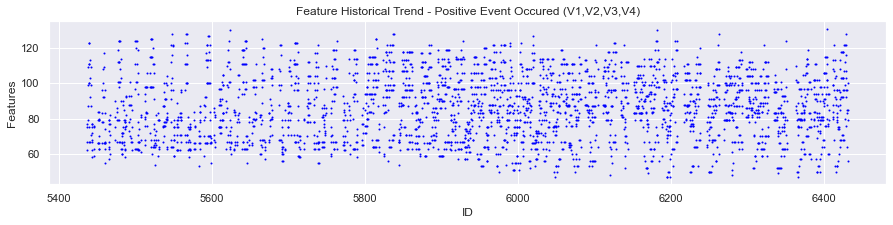

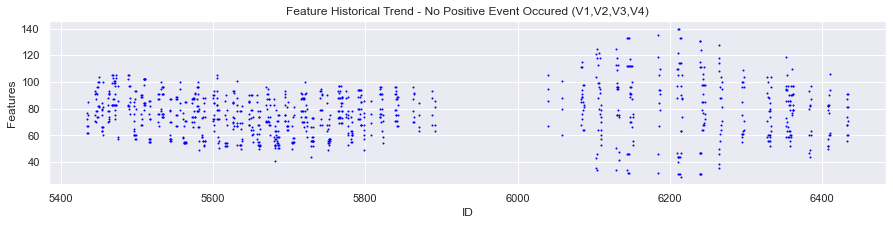

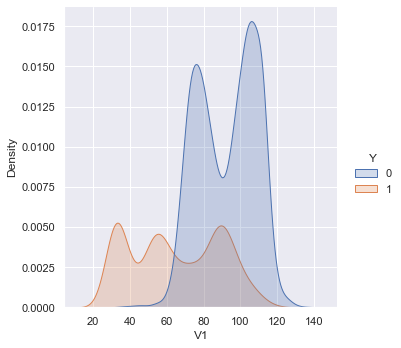

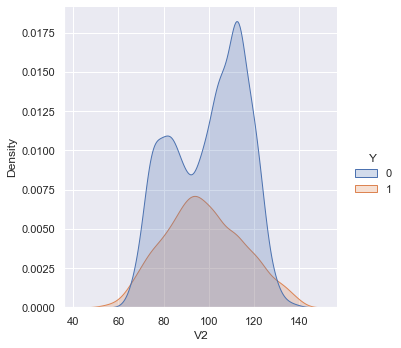

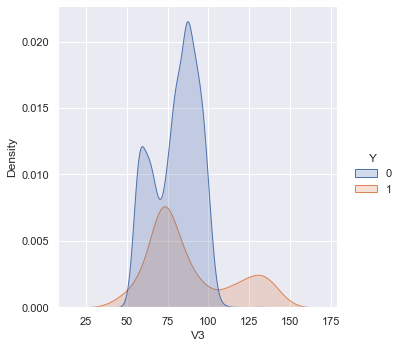

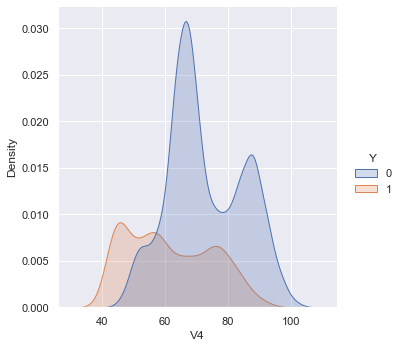

In [20]:
# Explore features trend over time
from common.plot_service import PlotService

service = PlotService(df)
pos_idx = (df.Y == 1)
neg_idx = (df.Y < 1)

service.plot_time_series('Positive Event Occured', pos_idx, ['V1', 'V2', 'V3', 'V4'])
service.plot_time_series('No Positive Event Occured', neg_idx, ['V1', 'V2', 'V3', 'V4'])
service.plot_dist(['V1', 'V2', 'V3', 'V4'])